### introduction to Keras

In [ ]:
import tensorflow as tf
import numpy as np

Python2.6 开始，新增了一种格式化字符串的函数 str.format()，它增强了字符串格式化的功能。基本语法是通过 {} 和 : 来代替以前的 %

图是tensorflow的核心，所有的操作都是基于图进行的，图中有很多的op，一个op又有一个或则多个的Tensor构成。
graph 和saver可以相互配合使用。可以说graph提供模型，saver提供数据。
在训练的中可以保存数据比如得到一个Weights值后，需要保存下来，以便下次再使用。
W = sess.graph.get_tensor_by_name('{}/conv2d_params:0'.format(tftensor)).eval()
softmax_tensor = sess.graph.get_tensor_by_name('layer/final_result:0')

resize the images
What about images that are not 256×256. Well, you can always convert any image to size 256×256 using the following steps.
- Non-Square aspect ratio: If the input image is not square, you can resize the image so that the smaller dimension is 256. Then, crop 256×256 pixels from the center of the image.

- Grayscale image: If the input image is not a color image, you can create a 3 channel image by copying the grayscale image into three channels.

transfer learning
- If you are using popular neural network architectures like GoogleNet or VGG-Net, you can use the weight trained on ImageNet instead of picking random initial weights to get much faster convergence.

the function is convex
- When the cost function is convex ( i.e. shaped like a bowl ), there is a principled way to iteratively find the best weight by a method called Gradient Descent

learning rate
- note that if you let the ball roll down at full velocity, it will overshoot the bottom and take much more time to settle down at the bottom compared to a ball that is rolled down slowly in a more controlled manner. Similarly, while training a neural network, we use a parameter called the learning rate to control convergence of cost to its minimum.

deep learning
- Deep Learning is a branch of AI which uses Neural Networks for Machine Learning.

some libraries
- more libraries which are useful for working with data ( h5py ) and visualization ( pydot, graphviz and matplotlib ).

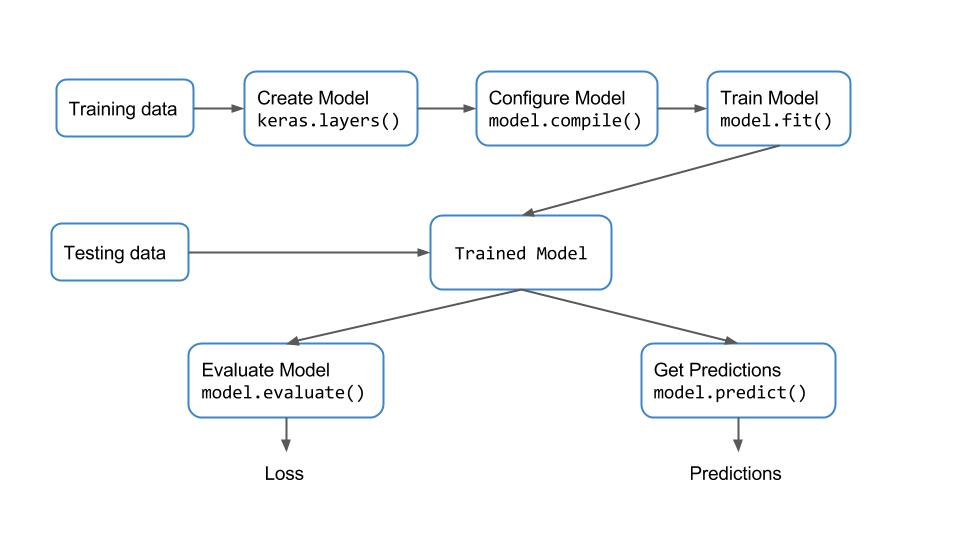




1 create model
#### keras.layers
Keras provides a number of core layers which include

- Dense layers, also called fully connected layer, since, each node in the input is connected to every node in the output,
- Activation layer which includes activation functions like ReLU, tanh, sigmoid among others,
- Dropout layer – used for regularization during training,
- Flatten, Reshape, etc.
Apart from these core layers, some important layers are

- Convolution layers – used for performing convolution,
- Pooling layers – used for down sampling,
- Recurrent layers,
Locally-connected, normalization, etc.

how to use
- from keras.layers import Dense, Activation, Conv2D, MaxPooling2D

#### define model
there are two ways showed below

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
#creating a model with a single dense layer with 10 outputs are equivalent.
# we also need to specify the input shape for the first layer using "input_shape"
model = Sequential([Dense(10, input_shape=(nFeatures,)), 
                    Activation('linear') ])
# or you can use codes below, both codes are the same function
from keras.models import Sequential
from keras.layers import Dense, Activation
 
model = Sequential()
model.add(Dense(10, input_shape=(nFeatures,)))
model.add(Activation('linear'))

#### configure the training process
the process
- Specify an Optimizer which determines how the network weights are updated
- Specify the type of cost function or loss function.
- Specify the metrics you want to evaluate during training and testing.
- Create the model graph using the backend.
- Any other advanced configuration.

the types of optimizers
- Stochastic Gradient Descent ( SGD ),
- Adam,
- RMSprop,(is a good choice for most problems)
- AdaGrad,
- AdaDelta, etc.

the tpyes of loss functions
- binary-cross-entropy for a binary classification problem,
- categorical-cross-entropy for a multi-class classification problem,
- mean-squared-error for a regression problem and so on.

the codes are showing below:

In [ ]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mse', 'mae'])

#### training 
We just need to specify the training data, batch size and number of epochs. Keras automatically figures out how to pass the data iteratively to the optimizer for the number of epochs specified. 
the usage is described below

In [ ]:
model.fit(trainFeatures, trainLabels, batch_size=4, epochs = 100)
# epochs 训练次数

#### evaluating the model
check the accuracy on unseen test data. can be done in two ways in Keras
- model.evaluate() – 
It finds the loss and metrics specified in the model.compile() step. It takes both the test data and labels as input and gives a quantitative measure of the accuracy. It can also be used to perform cross-validation and further finetune the parameters to get the best model.
- model.predict() – 
It finds the output for the given test data. It is useful for checking the outputs qualitatively.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import boston_housing
# Dense layer also means full-connection layer 
(X_train, Y_train), (X_test, Y_test) =boston_housing.load_data()

nFeatures = X_train.shape[1]

# create model
model = Sequential()
model.add(Dense(1, input_shape =(nFeatures,), activation ='linear'))

#config the process
model.compile(optimizer ='rmsprop', loss ='mse', metrics =['mse', 'mae'])
# 平均绝对误差(mean absolute error) 

#training
model.fit(X_train, Y_train, batch_size =4, epochs=1000)
model.summary()

In [ ]:
#evaluate the model
model.evaluate(X_test, Y_test, verbose =True)
Y_pred =model.predict(X_test)

In [ ]:
print(Y_pred[:5])
print("###############")
print(Y_pred[:5, 0])
#tips: covert the dim(n*1) to dim(1*m)

### image classification using feedforward neural network in Keras

 intresting sentence 
 If you are interested in diving into deep learning but don’t have much background in statistics and machine learning,## then this article is a perfect starting point.##
 

- convert the dim of  training set
dimData = np.prod(train_images.shape[1:])
#Return the product of array elements over a given axis.
#by default, return the product of all elements

- convert to one-hot encoding of labels set
For example, using a one-hot encoding for 10 classes, the integer 5 will be encoded as 0000010000

- dense layer
We use the Dense layer, also called fully connected layer since we are building a feedforward network in which all the neurons from one layer are connected to the neurons in the previous layer. 
Apart from the Dense layer, we add the ReLU activation function which is required to introduce non-linearity to the model. This will help the network learn non-linear decision boundaries. The last layer is a softmax layer as it is a multiclass classification problem. 


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(nClasses, activation='softmax'))

We also specify the loss type which is categorical cross entropy which is used for multiclass classification.In this step, we configure the optimizer to be rmsprop. You can also try using any other optimizer such as adam or SGD.

In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

We specify the number of epochs as 20. This means that the whole dataset will be fed to the network 20 times. We will be using the test data for validation.
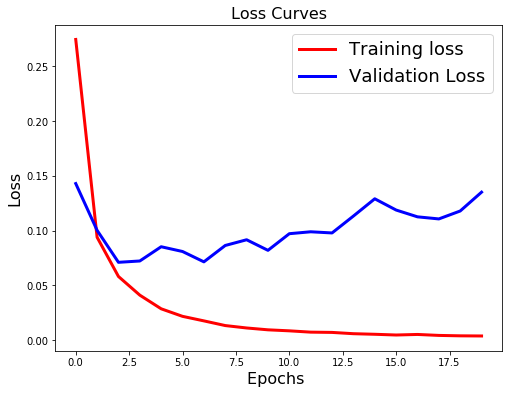


In [ ]:
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))

- droping out
In case of dropout, a fraction of neurons is randomly turned off during the training process, reducing the dependency on the training set by some amount
- RMSProp
RMSProp增加了一个衰减系数来控制历史信息的获取多少,经验上，RMSProp被证明有效且实用的深度学习网络优化算法。Adagrad会累加之前所有的梯度平方，而RMSprop仅仅是计算对应的平均值; that is considering the history, but not too much


In [ ]:
# there is little difference 
a =2
print("the number is", a)
print('************')
print('the number is {}'.format(a))

### unstanding activation functions

The activation function takes the decision of whether or not to pass the signal. In this case, it is a simple step function with a single parameter – the threshold.


(x1,x2,,xn) is the signal vector that gets multiplied with the weights (w1,w2,,wn) This is followed by accumulation ( i.e. summation + addition of bias b ). Finally, an activation function f is applied to this sum.

Note that the weights (w1,w2,..wn) and the bias b transform the input signal linearly. The activation, on the other hand, transforms the signal non-linearly and it is this non-linearity that allows us to learn arbitrarily complex transformations between the input and the output.

The activation function is also crucial for squashing the output of the neural network to be within certain bounds.

Linear activation function
f(x) =x
the input passes to the output without any modification.

Non-Linear activation functions
- sigmoid
It takes a real-valued number and squashes it into a range between 0 and 1. It is also used in the output layer where our end goal is to predict probability. It converts large negative numbers to 0 and large positive numbers to 1. Mathematically it is represented as

The figure below shows the sigmoid function and its derivative graphically

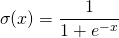

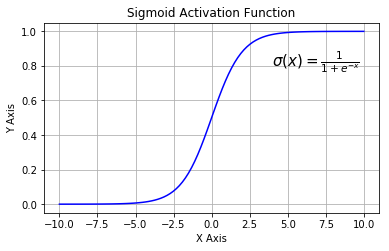

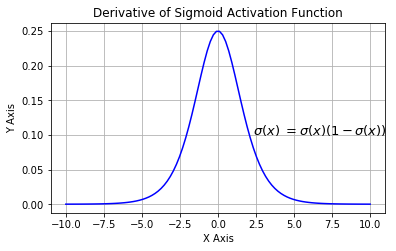

the three main drawbacks of sigmoid function:
- Vanishing gradients,saturated regime
- not zero centered
- computationally expensive, the exp() function is computationally expensive compared to
    other non-linear activation function


- tanh function
The negative inputs considered as strongly negative, zero input values mapped near zero, and the positive inputs regarded as positive. 

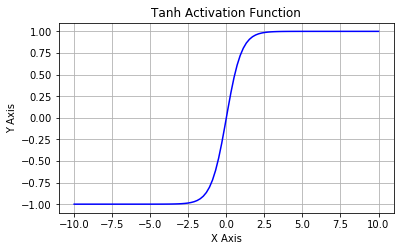

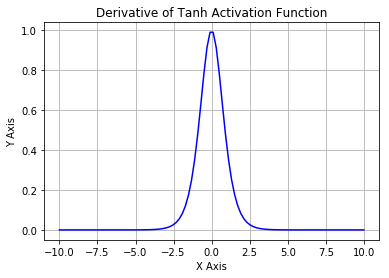

the drawback of tanh function:
    the tanh function also suffers from the vanishing gradient problem and therefore kills gradients when saturated
    

-rectified linear unit (ReLU)

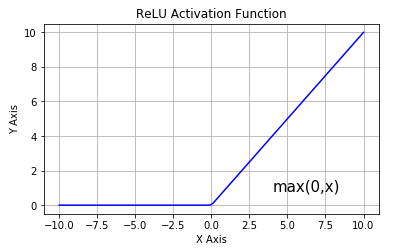

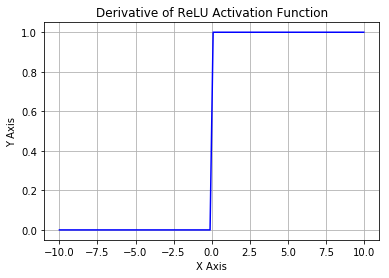

This activation makes the network converge much faster. It does not saturate which means it is resistant to the vanishing gradient problem at least in the positive region ( when x > 0), so the neurons do not backpropagate all zeros at least in half of their regions


- leaky relu

the problem :
the results achieved with it are not consistent, though it has all the characteristic of a ReLU activation function, i.e., computationally effecicent, converges much faster, does not saturate in positive region
in sum, doesnot work well and have no idea about why it is

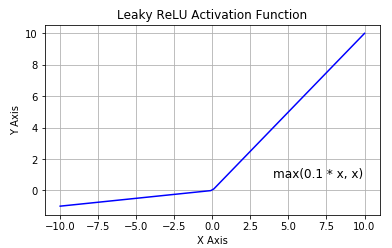

- parametric ReLu

where alpha is a hpyerparameter
This gives the neurons the ability to choose what slope is best in the negative region, and with this ability, they can become a ReLU or a leaky ReLU.


**In summary, it is better to use ReLU, but you can experiment with Leaky ReLU or Parametric ReLU to see if they give better results for your problem**


- SWISH
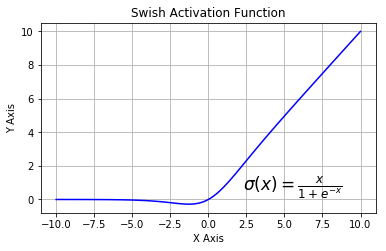

Also known as a self-gated activation function, has recently been released by researchers at Google. Mathematically it is represented as

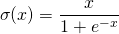

Swish has one-sided boundedness property at zero, it is smooth and is non-monotonic. It will be interesting to see how well it performs by changing just one line of code.

**According to the paper, the SWISH activation function performs better than ReLU**

### understanding autoencoders using Tensorflow(Python)

why cnn?
- we have to train separate MLPs for different locations 
- Another major problem with a fully connected classifier is that the number of parameters increases very fast since each node in layer L is connected to a node in layer L-1. So it is not feasible to design very deep networks using an MLP structure alone.

The**Fully connected network**tries to learn global features or patterns. It acts as a**good classifier**.

The first part consists of**Convolutional and max-pooling layers which act as the feature extractor**. The second part consists of the **fully connected layer** which performs non-linear transformations of the extracted features and acts as the **classifier**.
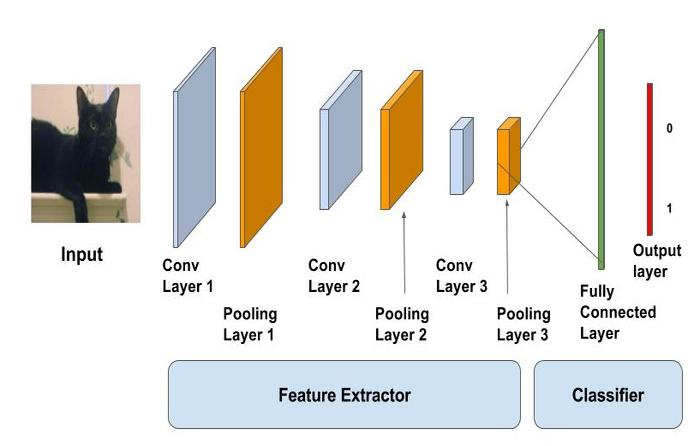

Typically, we use more than 1 filter in one convolution layer. If we use 32 filters we will have an activation map of size 30x30x32.



- convolutional layer
we can see from the above that the initial layers are looking at smaller regions of the image and thus can learn only simple features.and we go deeper into the network, the neurons get information from larger parts of the image and from various other neurons. Thus, the neurons at the later layers can learn more complicated features

- max pooling layer
Pooling layer is mostly used immediately after the convolutional layer to reduce the spatial size (only width and height, not depth). This reduces the number of parameters, hence computation is reduced. Using fewer parameters avoids overfitting.

the most common pooling operation is done with the filter of size 2*2  with a stride of 2, it essentially reduces the size of input by half



- CIFAR10 dataset
it has 50,000 training images and 10,000 test images. There are 10 classes like airplanes, automobile, birds, cats, deer, dog, horse, ship and truck. the images are of size of 32*32
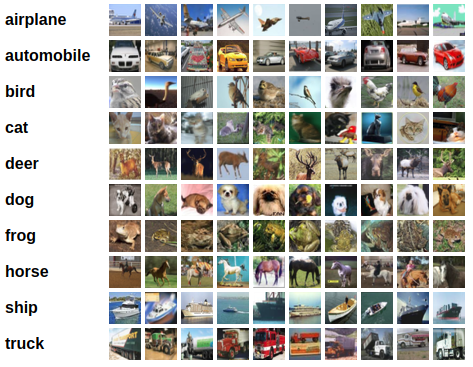



there are two ways to counter Overfitting
- regulation
dropout,
- more data to train
data augmentation: creating more images from the images you have by changing the size, orientation etc of the image

if you have done the dropout technique, there are still signs showing Overfitting, then you should try Image augmentation to produce more data for training


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
 
datagen = ImageDataGenerator(
#         zoom_range=0.2, # randomly zoom into images
#         rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

hands-on  亲自实践的; 实际动手操作的
autoencoder自编码器
jargon 行话; 行业术语; 黑话
strip vi.	剥光; 表演脱衣舞; 剥除
hierarchical  adj.	分层的; 按等级划分的，等级（制度）的
spatial size adj.	空间的; 存在于空间的; 
ETA :estimated time of arrival
words
dendrites 树突
axon 轴突
monotonic  单调的，无变化的
latent-space 潜在空间 bottleneck 瓶颈
upsamples 上采样

### understanding autoencoders using Tensorflow(Python)


- what is an autoencoder?
An autoencoder is an unsupervised machine learning algorithm that takes an image as input and reconstructs it using fewer number of bits. 

Autoencoders are similar in spirit to dimensionality reduction techniques like principal component analysis. They create a space where the essential parts of the data are preserved, while non-essential ( or noisy ) parts are removed.

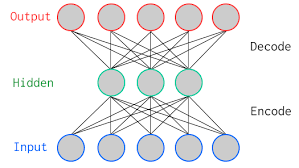

the implementation of denoising autoencoder 
Conv2d_transpose is for upsampling which is opposite to the role of a convolution layer.
the size of Conv2d_transpose is becoming bigger, on the opposite the size of Conv2d is becoming smaller

- demoising autoencoder 
The idea behind a denoising autoencoder is to learn a representation (latent space) that is robust to noise. 

The encoder part of the autoencoder transforms the image into a different space that preserves the handwritten digits but removes the noise.

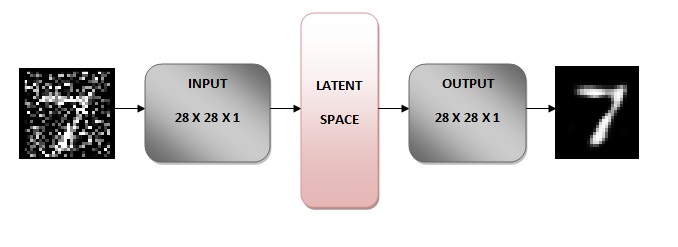

why do we use a leaky Relu and not a Relu as an activation function?

We stack many layers in a system in which there are some neurons whose value drop to zero or become negative.

Using a ReLU as an activation function clips the negative values to zero and in the backward pass, the gradients do not flow through those neurons where the values become zero. 

def lrelu(x,alpha=0.1):
  return tf.maximum(alpha*x,x)
  

numpy.clip(a, a_min, a_max, out=None)[source]
也就是说clip这个函数将将数组中的元素限制在a_min, a_max之间，大于a_max的就使得它等于 a_max，小于a_min,的就使得它等于a_min。


In [ ]:
#??, imgs_test =batch_x.reshape((-1,28,28,1))
imgs_test = batch_x[0].reshape((-1, 28, 28, 1))

# intresting codes of print()
    if (e+1) % display_step == 0:
        print("Epoch: {}/{}...".format(e+1, epochs),
                  "Training loss: {:.4f}".format(batch_cost),
                 "Validation loss: {:.4f}".format(batch_cost_test))
# reduce_sum(), reduce_mean(), reduce_average()
# the "reduce" means in certain dimonsion of the sum, mean, eg.


### Keras Tutorial: using pre-trained imagenet models
- training a classifier for a different task, using the features extracted using the above-mentioned models- This is also referred to Transfer Learning
- Training a classifier for a different task, by modifying  the weights of the above models- This is called Fine-tuning

-datasets
- ImageNet is a project which aims to provide a large image database for research purposes. It contains more than 14 million images which belong to more than 20,000 classes(or synsets). They also provide bounding box annotations for around 1 million images, which can be used in Object Localization tasks. It should be noted that they only provide URLs of images and you need to download those images

- ILSVRC ( ImageNet Large Scale Visual Recognition Challenge) is an annual competition organized by the ImageNet team since 2010. The training data is a subset of ImageNet with 1.2 million images belonging to 1000 classes. Sometimes, ILSVRC and ImageNet used interchangeably

for finding all the unknown parameters accurately, we would need a lot of data(in millions). If we have very few data, we will get only approximate values for most of the parameters, which we donnot want. Moral of the story is: for deep networks -more data-> Better learning
the problem is that it is difficult to get such huge labeled datasets for training the network

There are many models such as **AlexNet, VGGNet, Inception, ResNet, Xception**and many more which we can choose from, e.g, MobileNet, SqueezeNet

A trained model has two parts- Model Architecture and Model Weights. sometimes, the weights are large files,(of Keras version 2.12):
VGG16,
InceptionV3
ResNet
Xception
InceptionResNetV2


### transfer learning using pre-trained models
in this tutorial, we will discuss how to use those models mentioned in our previous tutorials as a Feature Extractor and train a new model for a different classification task.
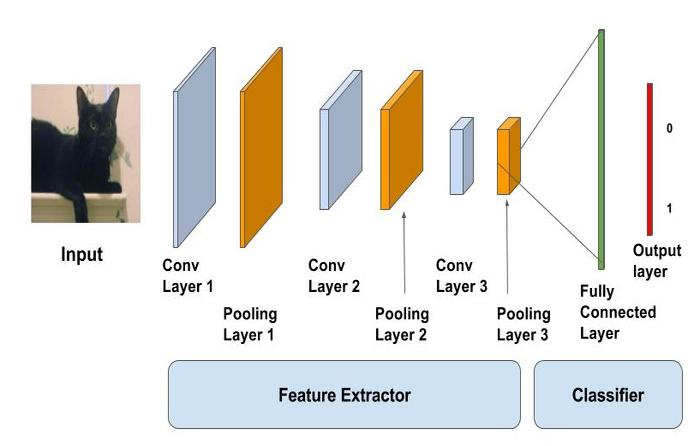
we can either use hte convolutional layers merely as a feature extractor or we can tweak the already trained convolutional layers to suit our problems at hand. The former approach is known as Transfer learning and the latter as Fine-tuning

as a rule of thumb, when we have a small training set and our problem is similar to the task for which the pre-trained models were trained, we can use transfer learning. If we have enough data, we can try and tweak the convolutional layers so that tehy learn more robust features relevant to our problems



### Fine-tuning using pre-trained models
in this tutorial, we will learn how to fine-tune a pre-trained model for a different task than it was originally trained for 

the task of fine-tuning a network is to tweak the parameters of an already trained network so that it adapts to the new task at hand
for fine-tuning, we want to keep the initial layers intact(or freeze them) and retain the later layers for our task

- freeze the required layers
for freezing the weights of a particular layer, we should set this parameter to False, indicating that this layer should not be trained

tweak 捏;拧;扭;苦恼,稍稍调整（机器、系统等）
as a rule of thumb 根据经验;一般来说
synset 同义词集
pumpkin 南瓜
cluster  杂乱;混乱;喧嚣
occluded 闭塞
at hand 手头;在手边， 在附近， 即将来临;凑手